# Wrangle and Analyze Data


[Gather Data](#1) 

[Assesing Data](#2)

[Cleaning](#3)

[Insight and Visualizations](#4)


In [2]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

# if using a Jupyter notebook, include magic word:
%matplotlib inline

<a id='1'></a>
# Gathering Data

In [3]:
# This comma separated file is given by Uducity.
# converting it into pandas dataframe with read_csv.

df_1 = pd.read_csv('twitter_archive_enhanced.csv')

In [4]:
# Checking what i have got in df_1
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# For second file Udacity asked to use requests library and gave url to download.
# making a response object:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Saving the contents of response object in file named "image-predictions.tsv"
# Need to check encoding?
with open('image-predictions.tsv', mode ='wb') as tsv_file:
    tsv_file.write(response.content)
    
# Keeping second file in df_2
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')    

In [6]:
# Checking what is in df_2
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Gathering Data from Twitter website using Tweepy and API

# Copied this whole code from twitter-api.py. made it mark down cell for timw being.

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [7]:
# Since data is already captured as JSON strings in given file i can use read_json
#df_3 = pd.read_json('tweet-json.txt', lines = True)

In [8]:
# but Udacity asked to read it line by line from dictionaries
#https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

# Making a list of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df3_list = []
with open('tweet_json.txt', 'r',encoding='utf8') as json_file:
    for each_line in json_file:
        # parsing each line with json.loads
        status = json.loads(each_line)
        
        # Append to list of dictionaries
        df3_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame from this list of Dictionaries
# column name are tweet_id, retweet_count, favorite_count and display_text_range
df_3 = pd.DataFrame(df3_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])


In [9]:
# Checking what have i captured in df_3
df_3.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


<a id='2'></a>
# Assesing  Data

## Assessing Dataframes ( to note down observations)

### df_1 ( twitter-archive-enhanced.csv)

In [10]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1159,724046343203856385,NaN,NaN,2016-04-24 01:24:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sarge. Not even he knows what his tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724046343...,10,10,Sarge,None,None,None,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None
1013,747219827526344708,NaN,NaN,2016-06-27 00:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,None,None,None,None
361,829501995190984704,NaN,NaN,2017-02-09 01:27:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He was a skater pup. She said see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None
1862,675432746517426176,NaN,NaN,2015-12-11 21:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday. Here's some golden puppers. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675432746...,12,10,None,None,None,None,None


In [11]:
# Checking for data types and Missing values
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Checking stastics summery
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Checking shape
df_1.shape

(2356, 17)

In [14]:
# source column is eclpispzed, want to see its whole valaues
# display maximum width of column "source"

pd.set_option('display.max_colwidth', None)
df_1.source

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [15]:
# not clear what is source yet:
# let us see its unique values array

df_1.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
# Checking Retweets to decide what to do with them
df_1.query('retweeted_status_id != "NaN"').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None


In [17]:
# What are dog names
df_1.name.value_counts().nlargest(15)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Toby         7
Bailey       7
Name: name, dtype: int64

In [18]:
# How the rating numertor are working
#df_1.rating_numerator.value_counts()

df_1.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [19]:
# why we have all values in four stages for each dog
# doggo, floofer , pupper,  puppo 4 stages

(df_1.doggo + df_1.floofer + df_1.pupper +df_1.puppo).value_counts()
#less than three None in string means one dog has more than one name.

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
dtype: int64

### df_2 (image-predictions.tsv)

In [20]:
# Checking what we have in df_2
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False


In [21]:
# Checking data types and missing values for df_2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Summery statistics
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### df_3 (tweet_json.txt)

In [23]:
# Checking data types and missing values for df_3
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   display_text_range  2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [24]:
# what does data look like here in df_3
df_3.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
1313,706681918348251136,1103,3627,"[0, 135]"
1610,685321586178670592,735,2910,"[0, 93]"
1979,672970152493887488,391,1019,"[0, 107]"
2307,666804364988780544,95,250,"[0, 135]"
406,823699002998870016,2772,13826,"[0, 135]"


In [25]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Column descriptions

Took some help from  https://media.twitter.com/en_us/twitter-basics.html

#### df_1 ( DataFrame from  twitter-archive-enhanced.csv)

*You can include up to 4 photos, a GIF, or a video in your Tweet.

1. tweet_id: the unique identifier for each tweet = status id

2. in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

3. in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

4. timestamp: time when this Tweet was created

5. source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

6. text: actual UTF-8 text of the status update

7. retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

8. retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

9. retweeted_status_timestamp: time of retweet

10. expanded_urls: tweet URL
11. rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10

12. rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

13. name: name of the dog

14. doggo: one of the 4 dog "stage"

15. floofer: one of the 4 dog "stage"

16. pupper: one of the 4 dog "stage"

17. puppo: one of the 4 dog "stage"

#### df_2 ( DataFrame from image-predictions.tsv)

1. tweet_id: the unique identifier for each tweet also called status id.

2. jpg_url: dog's image URL.

3. img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

4. p1: algorithm's #1 prediction for the image in the tweet.

5. p1_conf: how confident the algorithm is in its #1 prediction.

6. p1_dog: whether or not the #1 prediction is a breed of dog.

7. p2: algorithm's #2 prediction for the image in the tweet.

8. p2_conf: how confident the algorithm is in its #2 prediction.

9. p2_dog: whether or not the #2 prediction is a breed of dog.

10. p3: algorithm's #3 prediction for the image in the tweet.

11. p3_conf: how confident the algorithm is in its #3 prediction.

12. p3_dog: whether or not the #3 prediction is a breed of dog.


#### df_3  ( DataFrame from Twitter API)

1. tweet_id: the unique identifier for each tweet.

2. retweet_count: number of times this Tweet has been retweeted.

3. favorite_count: indicates approximately how many times this Tweet has been liked by Twitter users

4. display_text_range: an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet


#### Quality Issues

1. In df_1 "retweeted_status_id" I think these are re-tweets.delete these rows.

2. In df_1 After deleting retweeted_status_id rows,some columns will not meet single variable rule like
    a. retweeted_status_id
    b. retweeted_status_user_id
    c. retweeted_status_timestamp


3. In df_1 timestamp datatype is string object.Covert it to datetime.

4. in_reply_to_status_id and in_reply_to_user_id to data type should be same as tweet_id i.e integer.

5. Few (14) rows have two dog stages for one dog.

6. I am unable to understand Rating numerators.Some rating numerators are relatively high.

7. In text, dogs have ratings in decimal but datatype for ratings is integer.

8. Rating denominators do not make sense to me.Some denominators are relatively high.

9. df1, df2, and df3 does not have same number of rows. Looks like images are missing from df2 and some extra rows in df2.

10. In df_2 The dog breed name values in the p1, p2, and p3 columns are not consistant.

11. In df_1, source column has hyperlinks.It needs only source name.

12. In df_1, some dog names are not actually names. For example names are "None" for 745 dogs.55 dogs have name "a"

13. Column headers should be more descriptive (examples of non-descriptive column header are img_num, p1, p1_conf, p1_dog, etc.)
*Make sure that capitalization of the values is uniform and replace the underscores with spaces for readability.


#### Structural Issues (Tidiness)

1. In df_1, dog stages columns should be one column with four stages in it.

2. Merging three data files into one for analysis.(Each type of observational unit should form a table)

<a id='3'></a>
# Cleaning
Define Code Test

In [26]:
# Make a copy of each dataframe before cleaning

df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()

#### 1. Define, Code, Test 

In df_1, we need only original Tweets for Analysis, Delete rows with "retweeted_status_id" is not null.

In [27]:
#Code-1
# keep only those rows with null values in retweeted_status_id column
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]

In [28]:
# Test 1
#df1_clean.retweeted_status_id.isnull().count()
(df1_clean[df1_clean.retweeted_status_id.isnull() == False]).shape

(0, 17)

#### 2. Define, Code, Test 
In df_1 After deleting retweeted_status_id rows,some columns will not meet single variable rule like a. retweeted_status_id b. retweeted_status_user_id c. retweeted_status_timestamp. All these column has a constant value in them. Drop these columns.

In [29]:
# Code-2 it is Tidiness issue.
df1_clean = df1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [30]:
#Test-2
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

#### 3. Define, Code, Test 
In df_1, timestamp datatype is string object , Covert it to datetime.

In [31]:
# Code-3
# Converting timestamp datatype to datetime
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

In [32]:
# Test-3
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

#### 4. Define, Code, Test 
In df_1,  Convert in_reply_to_status_id and in_reply_to_user_id to datatype integer to be consistant with tweet_id.

In [33]:
# Code-4

# Need to fill NaN with zero to change datatype to integer.
# I dont think converting NaN to zero is a good idea to make it int64, zero is a value, NaN is null.
# but datatypes need to be consistant for all tweet_ids. Confused.

df1_clean.in_reply_to_status_id = df1_clean.in_reply_to_status_id.fillna(0).astype(np.int64)
df1_clean.in_reply_to_user_id = df1_clean.in_reply_to_user_id.fillna(0).astype(np.int64)

In [34]:
# Test-4
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

#### 5. Define, Code, Test 
14 in df_1, (12 in df1_clean) rows have two dog stages for one dog. One dog can have only only one stage. Replace second stage with None.

In [35]:
# Code-5
# 10 rows with doggo and pupper name. 

#As per the dogtionary, doggo and pupper are sometimes used interchangeably.
# I am keeping pupper stage and setting doggo column to None for these rows.

df1_clean.loc[((df1_clean.doggo != 'None') & (df1_clean.pupper != 'None')), "doggo"] = "None"

In [36]:
# checking text for get a hint for true stage when it has both doggo and puppo
df1_clean.query('(doggo != "None") & (puppo != "None")').text

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

In [37]:
# checking text for get a hint for true stage when it has both doggo and floofer
df1_clean.query('(doggo != "None") & (floofer != "None")').text

200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object

In [38]:
#Code-5

#for 1 row with doggo and puppo stages replacing doggo with None after looking at text.
#for 1 row with doggo and floofer stages replacing doggo with None afer loking at text.

df1_clean.loc[((df1_clean.doggo != 'None') & (df1_clean.puppo != 'None')), "doggo"] = "None"
df1_clean.loc[((df1_clean.doggo != 'None') & (df1_clean.floofer != 'None')), "doggo"] = "None"

In [39]:
# Test-5
#less than three None in string means row has more than one stage.
(df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo).value_counts()


NoneNoneNoneNone       1831
NoneNonepupperNone      234
doggoNoneNoneNone        75
NoneNoneNonepuppo        25
NoneflooferNoneNone      10
dtype: int64

#### 6. Define, Code, Test
I am unable to understand Rating numerators.Some rating numerators are much higher.

https://classroom.udacity.com/nanodegrees/nd002-ent/parts/f55ce890-c08c-46a5-b57f-55a06c1cc6ae/modules/a8fcd18c-b9a5-4852-a7ec-6dbb08ebfe5a/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/28d4643b-3785-4700-bdee-4e5fc9963576

The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

In [40]:
#Code-6
# Leaving higher numerators as is.


In [41]:
#Test-6
df1_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,  182,
         15,  960,    0,    7,   84,   24,   75,   27,    3,    8,    9,
          4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,    1,
        143,  121,   20,   26,    2,  144,   88])

#### 7. Define, Code, Test 

In text column, dogs have ratings in decimals but datatype for ratings is integer. Get true float ratings from text and save these into df1_clean.

https://knowledge.udacity.com/questions/33009


In [42]:
# Code-7

# https://docs.python.org/3/howto/regex.html

# Code: change data type for column
df1_clean.rating_numerator = df1_clean.rating_numerator.astype(float)

# Read only float values into temporary column, include "/10" in search, but not extraction
df1_clean['rating_num_tmp'] = df1_clean[df1_clean.text.str.contains(r"(\d+\.\d+\/\d+)")].text.str.extract(r"(\d+\.\d+)")

# Transfer the float values to rating_numerator column
df1_clean.loc[df1_clean['rating_num_tmp'].notnull(), ['rating_numerator']] = df1_clean['rating_num_tmp']

# Delete temp column
df1_clean.drop(['rating_num_tmp'], axis=1, inplace=True)

/home/shazia/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [43]:
# Test-7
df1_clean.rating_numerator.unique()

array([13.0, 12.0, 14.0, '13.5', 17.0, 11.0, 10.0, 420.0, 666.0, 6.0,
       182.0, 15.0, 960.0, 0.0, 7.0, 84.0, 24.0, '9.75', 5.0, '11.27',
       3.0, 8.0, 9.0, 4.0, 165.0, 1776.0, 204.0, 50.0, 99.0, 80.0, 45.0,
       60.0, 44.0, 1.0, 143.0, 121.0, 20.0, '9.5', '11.26', 2.0, 144.0,
       88.0], dtype=object)

#### 8. Define, Code, Test 
Some denominators are higher than 10. Replace all denomnators with 10.

In [44]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   object             
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

In [45]:
#Code-8
df1_clean["rating_denominator"] = 10

In [46]:
#Test-8
df1_clean.rating_denominator.unique()

array([10])

#### 9. Define, Code, Test 
df1,df2, and df3 do not have same tweet_ids. Looks like images are missing from df_2 as it has least number of rows. Romove rows with no image info from df1 .81 extra tweet_ids in df2 needs to be deleted which are not there in df1.

In [47]:
#Code-9

# Removing rows from df1, which do not have tweet_id in df2
df1_clean = df1_clean[df1_clean.tweet_id.isin(df2_clean.tweet_id)]

#Deleting rows from df2, which do not have tweet_id in df1
df2_clean = df2_clean[df2_clean.tweet_id.isin(df1_clean.tweet_id)]


#Deleting rows from df3, which do not have tweet_id in df1 or df2 (both have same tweet_ids)
df3_clean = df3_clean[df3_clean.tweet_id.isin((df2_clean.tweet_id))]

In [48]:
# Test-9
# isin() returns an array of boolean, zero means false value, nonzero means true.

x = df1_clean.tweet_id.isin(df2_clean.tweet_id)
y = df2_clean.tweet_id.isin(df1_clean.tweet_id)
z = df3_clean.tweet_id.isin(df1_clean.tweet_id)

np.count_nonzero(x), np.count_nonzero(y), np.count_nonzero(z)

(1994, 1994, 1994)

#### 10. Define, Code, Test 
In df_2 The dog breed name values in the p1, p2, and p3 columns are not consistant capitalization wise.

In [49]:
# Code-10
#changing p1,p2,p3 to lowercase

df2_clean['p1'] = df2_clean['p1'].str.lower()
df2_clean['p2'] = df2_clean['p2'].str.lower()
df2_clean['p3'] = df2_clean['p3'].str.lower()

In [50]:
#Test-10
df2_clean.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,west_highland_white_terrier,0.769159,True,scotch_terrier,0.064369,True,old_english_sheepdog,0.043763,True
1555,793195938047070209,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,labrador_retriever,0.654762,True,golden_retriever,0.074100,True,chihuahua,0.042339,True
1461,778286810187399168,https://pbs.twimg.com/media/Cs0HuUTWcAUpSE8.jpg,1,boston_bull,0.322070,True,pug,0.229903,True,muzzle,0.101420,False
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,gordon_setter,0.503672,True,yorkshire_terrier,0.174201,True,pekinese,0.109454,True
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,american_staffordshire_terrier,0.569501,True,staffordshire_bullterrier,0.211308,True,chihuahua,0.121839,True
40,666691418707132416,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,german_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True


#### 11. Define, Code, Test 
In df_1, source column has complete hyperlinks.It needs only source name.Strip off the href part.

In [51]:
#Code
# Using str.replace funtion and regex to replace not needed part with empty spaces here

df1_clean.source = df1_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [52]:
#Test
df1_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

## Tidiness

#### 1. Define, Code, Test 
In df_1, dog stages columns should be a in one column like categorical data.

In [53]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   object             
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

In [54]:
# Code-1

# making a new column named stage with all values from four dog stages.
df1_clean['stage'] = (df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo)

In [55]:
# deleting three Nones from stage coulmn with str.replace

df1_clean.stage = df1_clean.stage.str.replace('None','',3)

In [56]:
# Deleting four columns of dog stages
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [57]:
#Test-1
df1_clean.stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [58]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   object             
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  stage                  1994 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory us

#### 2. Define, Code, Test 
Merging three data files into one for analysis.(Each type of observational unit should form a table)

In [59]:
# Code-2
# merging all three dataframes with inner join. Missing rows and extra rows issue has already been resolved.

master= df1_clean.merge(df2_clean.merge(df3_clean, on='tweet_id'), on='tweet_id')

In [60]:
#Test-2
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   object             
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  stage                  1994 non-null   object             
 11  jpg_url                1994 non-null   object           

### Saving clean dataframe as csv file

In [61]:
# Save it once only
master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='4'></a>
# Insight and Visualizations

### Total time for this experiment .

In [62]:
master.timestamp.max() - master.timestamp.min()

Timedelta('624 days 17:51:48')

### Most popular source of Twitter

In [63]:
master.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Average number of favourites(Likes) per tweet.

In [64]:
master.favorite_count.mean()

8895.725677031094

In [65]:
round(master.favorite_count.mean())

8896

### What are famous names for dogs?

In [66]:
master.name.value_counts().nlargest(10)

None       546
a           55
Charlie     11
Oliver      10
Cooper      10
Lucy        10
Penny        9
Tucker       9
Winston      8
Sadie        8
Name: name, dtype: int64

### More dog rating come from winter months.

In [67]:
# Counting ratings for each month and save it in var2
var2 = df1_clean.timestamp.dt.month.value_counts().sort_index()

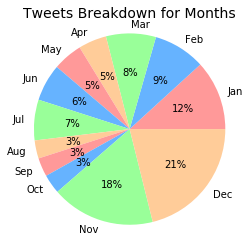

In [68]:
# Making a Pie Chart on var2

sizes = var2.values
labels = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

plt.title('Tweets Breakdown for Months',fontsize=14, verticalalignment='top')
#plt.legend(labels, loc='best')
colors = ( '#ff9999','#66b3ff','#99ff99','#ffcc99')
 
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors=colors, radius = 1.1);

### What is the percentage of True First Predictions by Algorithm at 95% confidence interval?

In [69]:
#True predictions at confidence interval 95% or higher
master.query('p1_conf >= 0.95 & p1_dog == True').tweet_id.count()/master.query('p1_conf >= 0.95').tweet_id.count()*100

72.37354085603113

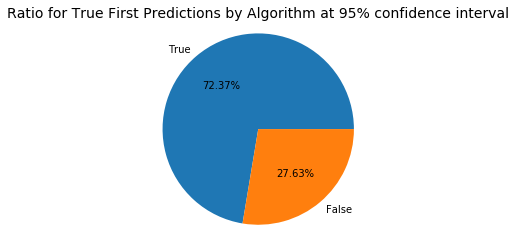

In [70]:
sizes = master.query('p1_conf >= 0.95 & p1_dog == True').tweet_id.count(),master.query('p1_conf >= 0.95 & p1_dog == False').tweet_id.count()
labels = ['True', 'False']

plt.title('Ratio for True First Predictions by Algorithm at 95% confidence interval',fontsize=14, verticalalignment='top')

 
plt.pie(sizes, labels=labels, autopct='%1.2f%%',  radius = 1.1);

### False Predictions regardless of confidence level

In [71]:
# at any confidence interval which predivtion was best 
v_1 = master.query('p1_dog == False').tweet_id.count()
v_2 = master.query('p2_dog == False').tweet_id.count()
v_3 = master.query('p3_dog == False').tweet_id.count()
v_1, v_2, v_3

(517, 499, 548)

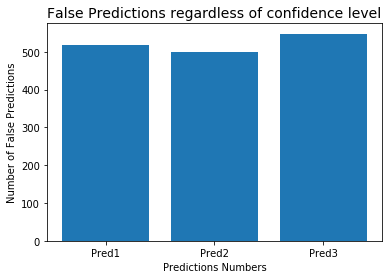

In [72]:
# Making a bar chart for False predictions.
sizes = v_1, v_2, v_3
labels = ['Pred1','Pred2','Pred3']
plt.xlabel("Predictions Numbers")
plt.ylabel("Number of False Predictions")
plt.title("False Predictions regardless of confidence level",fontsize=14)
plt.bar(labels,sizes);